In [1]:
# General tools
import matplotlib.pyplot   as plt
import numpy               as np
import reciprocalspaceship as rs
from scipy.stats import rice, foldnorm

We'll need to obtain $r_{DW}$ and $|E|$ from the input MTZ.

In [2]:
# path="double_wilson_data\\"   # Windows
path = "double_wilson_data/"    # Unix
mtz1 = "5e1y_phases_scaled_w_rDW"
ds1  = rs.read_mtz(path + mtz1 + ".mtz")
# ds1.info()

In [3]:
E_ref = ds1["EP_1_aniso_2"].to_numpy()
r_DW  = ds1["r_DW_out_EP_1_aniso_2"].to_numpy()

Missing data can be resolved by setting r_DW to 0 (and E_ref to any number), such that the priors for those data will simply be the Wilson distributions

**ACENTRIC: Wikipedia to SciPy map for Rice**
- ```b     ``` =  $\nu/\sigma$
- ```loc   ``` =  $0$
- ```scale ``` =  $\sigma$

$\nu$, the conditional mean, equals ```r_DW * |E|```

$\sigma$ is the conditional variance, $\frac{1}{2} (1-r_{DW}^2)$ (for acentrics only)

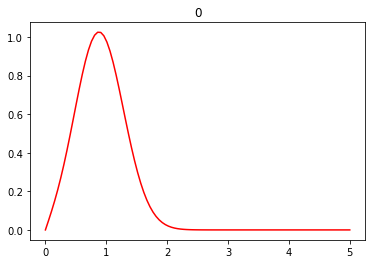

In [6]:
cond_mean   = (E_ref * r_DW)
nu          = cond_mean            # <<== KMD
cond_var_ac = 0.5*(1-r_DW**2)
sigma_ac    = np.sqrt(cond_var_ac) # <<== KMD
b           = nu/sigma_ac
scale       = sigma_ac

x=np.linspace(0,5,100)
for i in [0]: #[4,6,11]:
    plt.plot(x, rice.pdf(x, b=b[i], scale=scale[i]),'r-')
#     plt.plot(cond_mean[i]*np.asarray([1, 1]),plt.ylim(),'k:')
    plt.title(str(i)); plt.show()

**CENTRIC: Wikipedia to SciPy map for Folded Normal**

- ```c    ``` = $\mu/\sigma$
- ```loc  ``` = 0
- ```scale``` = $\sigma$

$\mu$ is the conditional expectation, ```r_DW * |E|```

$\sigma$ is the conditional variance, $(1-r_{DW}^2)$ (for the centrics; note the missing factor $\frac{1}{2}$)


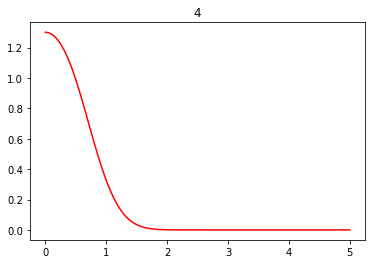

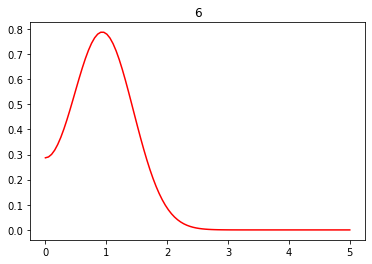

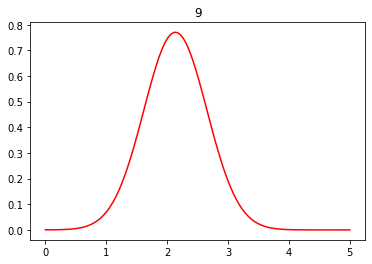

In [8]:
mu = cond_mean                 # <<== KMD
cond_var_c = (1-r_DW**2)
sigma_c = np.sqrt(cond_var_c)  # <<== KMD

c=mu/sigma_c
scale=sigma_c
x=np.linspace(0,5,100)
for i in [4,6,9]:
    plt.plot(x, foldnorm.pdf(x, c=c[i],scale=scale[i]),'r-')
#     plt.plot(cond_mean[i]*np.asarray([1, 1]),plt.ylim(),'k:')
    plt.title(str(i)); plt.show()